In [34]:
import pandas as pd 
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [35]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams['font.size']=14
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [37]:
iris.species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [38]:
iris['species_map']=iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

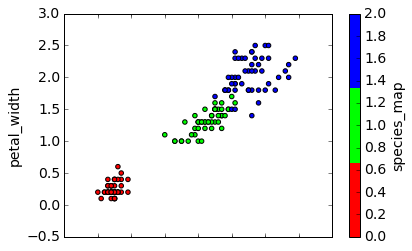

In [39]:
iris.plot(kind='scatter',x='petal_length',y='petal_width',c='species_map',colormap=cmap_bold)

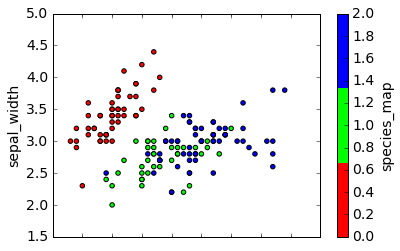

In [40]:
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_map', colormap=cmap_bold)

In [41]:
feature_cols=['sepal_length','sepal_width','petal_length','petal_width']

In [42]:
X=iris[feature_cols]

In [43]:
X=iris.drop(['species','species_map'], axis=1)

In [44]:
X=iris.iloc[:,0:4]

In [45]:
X=iris.loc[:,'sepal_length':'petal_width']

In [46]:
y=iris.species_map

In [47]:
type(X.values)

numpy.ndarray

In [48]:
type(y.values)

numpy.ndarray

In [49]:
X.shape

(150, 4)

In [50]:
y.shape

(150,)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn = KNeighborsClassifier(n_neighbors=1)

In [53]:
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

In [54]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

- Once a model has been fit with data, it's called a 'fitted model'

**Step 4**:predict the response for a new observation
- New observation are called 'out-of-sample' data
- Uses the information it learned during the model training process

In [55]:
knn.predict([3,5,4,2])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([2])

- Returns a NumPy array, and we keep track of what the numbers "mean"
- Can predict for multiple observation at once

In [56]:
X_new = [[3,5,4,2],[5,4,3,2]]
knn.predict(X_new)

array([2, 1])

# Tuning a KNN model

In [57]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X,y)
knn1.predict(X_new)

array([1, 1])

**Question:**Which model produced the correct predictions for the two unknown irises?

**Answer:**We don't know, because these are **out-of-sample observations**, meaning that we don't know the true responses value. Our goal with supervised learning is to build models that generalize to out-of-sample data. However, we can't truly measure our models will preform on out-of-sample data. 

**Question:**Does that mean that we have to guess how well our models are likely to do?

**Answers:**Thankfully, no, next we will learn **model evaluation procedure**, which allows us to use our label data to estimate how well our models are likely to preform on out-of-sample data. However, we can't truely measure our models will perform on out-of-sample data. 

In [31]:
knn1.predict_proba(X_new)

array([[ 0. ,  0.8,  0.2],
       [ 0. ,  1. ,  0. ]])

In [32]:
y_pred_class=knn1.predict(X)

To evaluate a model, we also need an evaluation metric:

Most common choices for classification problems:
- **Classification accuracy**: percentage of correct predicitons(reward function, since higher is better)
- **Classification error**: percentage of incorrect predictions("loss function" since lower is better)

In [33]:
from sklearn import metrics
metrics.accuracy_score(y,y_pred_class)

0.96666666666666667

This is known as training accuracy because we are evaluating the model on the same data we used to train the model. 

## Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models*8 that won't necessarily generalize**
- Unnecessarily complex models overfit the training data:

**Thus, training accuracy is not a good estimate of out-of-sample accuracy**

# Evaluation processdure #2: Train/Test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

**Testing accuracy is a better estimate of out-of-sample performance than trainiing accuracy**

## Understanding "unpacking"


In [58]:
def min_max(x):
    smallest=min(x)
    largest=max(x)
    return [smallest, largest]

min_and_max = min_max([1,2,3])
min_and_max

[1, 3]

In [59]:
type(min_and_max)

list

In [60]:
the_min, the_max = min_max([1,2,3])
the_min

1

In [61]:
the_max

3

## Understanding the train_test_split function

In [64]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [66]:
X.shape

(150, 4)

In [67]:
X_train.shape

(112, 4)

In [69]:
y_test.shape

(38,)

In [70]:
y.shape

(150,)

In [71]:
y_train.shape

(112,)

In [72]:
y_test.shape

(38,)

## Understanding the random_state parameter


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train.head(1)
X_test.head(1)
y_train.head(1)
y_test.head(1)

142    2
Name: species_map, dtype: int64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
X_train.head(1)
X_test.head(1)
y_train.head(1)
y_test.head(1)

139    2
Name: species_map, dtype: int64

## Using the train/test split procedure(K=1)

In [83]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=99)

In [84]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [87]:
y_pred_class = knn.predict(X_test)
metrics.accuracy_score(y_pred_class,y_test)

0.92105263157894735

## Repeating for K=50

In [88]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred_class=knn.predict(X_test)
metrics.accuracy_score(y_pred_class,y_test)

0.97368421052631582

## Comparing testing accuracy with null accuracy
Null accuracy is the accuracy that could be achieved by **always predicting the most frequent class**. It is a benchmark against which you may want to measure you classification model. 

In [89]:
y_test.value_counts()

1    14
2    12
0    12
Name: species_map, dtype: int64

In [93]:
y_test.value_counts()[1]/len(y_test)

0.36842105263157893

## Searching for the "best" value of K

In [94]:
len(y_train)

112

In [99]:
k_range=range(1,51)
training_error=[]
testing_error=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    y_pred_class=knn.predict(X_test)
    training_accuracy=metrics.accuracy_score(y_test,y_pred_class)
    training_error.append(1-training_accuracy)
    knn.fit(X_train,y_train)
    y_pred_class=knn.predict(X_test)
    testing_accuracy=metrics.accuracy_score(y_test,y_pred_class)
    testing_error.append(1-testing_accuracy)

In [104]:
column_dict={'K':k_range, 'training error':training_error, "testing_error":testing_error}
df=pd.DataFrame(column_dict).set_index('K')

In [105]:
df

,testing_error,training error
K,,
1,0.078947,0.000000
2,0.078947,0.026316
3,0.078947,0.078947
4,0.052632,0.078947
5,0.078947,0.078947
6,0.052632,0.052632
7,0.052632,0.078947
8,0.052632,0.052632
9,0.052632,0.052632


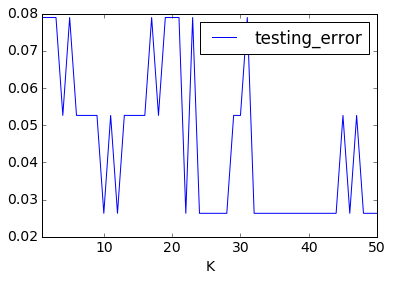

In [110]:
df.plot(y='testing_error')

In [111]:
min(zip(testing_error, k_range))

(0.026315789473684181, 10)

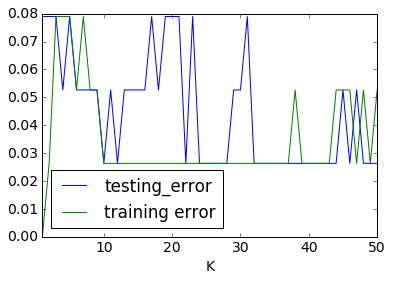

In [112]:
df.plot()

In [115]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X,y)
knn.predict([3,6,4,2])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

## Disadvantages of train/test split?

- Testing accuracy is a high-variance estimate of out-of-sample accuracy
- K-fold cross_validation overcomes this limitation and provides more reliable estimates
- But, train/test split is still useful because of its flexibility and speed